In [1]:
from __future__ import division
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import cPickle, h5py, os, glob

from oc_ica import analysis, styles, plotting
reload(analysis)

/home/jesse/anaconda3/envs/python27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<module 'oc_ica.analysis' from '/home/jesse/Development/oc_ica/oc_ica/analysis.pyc'>

# HDF5 Storage

In [2]:
base_folder = '/home/jesse/Development/results/oc_ica/'

In [3]:
n_mixtures = 32
OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5']
OC_k = 6
priors = ['COHERENCE_SOFT', 'COHERENCE', 'INIT']
keep_max = False

ks = [2, 4, 6, 8, 10, 12, 14, 16]
k_OC = '3.0'

In [3]:
reload(analysis)

for OC in OCs:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, OC, OC_k, priors, keep_max, overwrite=True)
    
for k in ks:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, k_OC, k, priors, keep_max, overwrite=True)

kkkkkkkkkkkkkk 2
kkkkkkkkkkkkkk 2
kkkkkkkkkkkkkk 4
kkkkkkkkkkkkkk 4
kkkkkkkkkkkkkk 6
kkkkkkkkkkkkkk 6
kkkkkkkkkkkkkk 8
kkkkkkkkkkkkkk 8
kkkkkkkkkkkkkk 10
kkkkkkkkkkkkkk 10
kkkkkkkkkkkkkk 12
kkkkkkkkkkkkkk 12
kkkkkkkkkkkkkk 14
kkkkkkkkkkkkkk 14
kkkkkkkkkkkkkk 16
kkkkkkkkkkkkkk 16


# Summary Plots

In [4]:
reload(analysis)
reload(plotting)
k_OC = '2.0'
OC_k = 12

results, null_results, lambdas = analysis.comparison_analysis_postprocess(base_folder,
                                                                          n_mixtures, k_OC, OC_k, priors, keep_max)


OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5', '4.0']
keep_OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5']

#OCs = ['1.0', '1.5']
#keep_OCs = ['1.0', '1.5']

models = ['2', '4', 'COULOMB', 'COULOMB_F', 'RANDOM', 'RANDOM_F', 'SC', 'SM']
#keep_models = ['2', '4', 'COULOMB', 'COULOMB_F', 'RANDOM', 'RANDOM_F', 'SM', 'SC']
keep_models = ['2', '4', 'COULOMB_F', 'SM', 'SC']
keep_models = models

ks = [2, 4, 6, 8, 10, 12, 14, 16]
#ks = [2, 4]

n_prior = 0
f = plt.figure(figsize=(5, 4))

l_edge = .07125
r_edge = .01
top_edge = .05
bot_edge = .1
width = .26
h_gap = (1 - l_edge -r_edge - 3 * width ) / 2
height = .35
mid_gap = 1 - top_edge - bot_edge - 2 * height
print(width, height, mid_gap)

ap = f.add_axes((l_edge, 1 - top_edge - height, width, height))
ax1 = f.add_axes((l_edge + width + h_gap, 1 - top_edge - height, width, height))
ax2 = f.add_axes((l_edge + 2 * width + 2 * h_gap, 1 - top_edge - height, width, height))
ax3 = f.add_axes((l_edge + width + h_gap, bot_edge, width, height))
ax4 = f.add_axes((l_edge + 2 * width + 2 * h_gap, bot_edge, width, height))

plotting.recovery_vs_lambda(models, keep_models, results, null_results, lambdas,
                            priors, n_prior, ap, add_ylabel=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              True, ax1, priors, n_prior,
                              OCs=OCs, keep_OCs=keep_OCs, OC_k=OC_k, add_ylabel=True, add_xlabel=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              False, ax2, priors, n_prior,
                              ks=ks, k_OC=k_OC, add_ylabel=True, add_xlabel=True)

OC_k = 6
k_OC = '3.0'

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              True, ax3, priors, n_prior,
                              OCs=OCs, keep_OCs=keep_OCs, OC_k=OC_k,
                              add_ylabel=True, add_xlabel=True,
                              legend=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              False, ax4, priors, n_prior,
                              ks=ks, k_OC=k_OC,
                              add_xlabel=True, add_ylabel=True)
y1 = .965
y2 = .47
x1 = .01
x2 = .33
x3 = .67
f.text(x1, y1, 'A', fontsize=styles.letter_fontsize)
f.text(x2, y1, 'B', fontsize=styles.letter_fontsize)
f.text(x3, y1, 'C', fontsize=styles.letter_fontsize)
f.text(x2, y2, 'D', fontsize=styles.letter_fontsize)
f.text(x3, y2, 'E', fontsize=styles.letter_fontsize)

plt.savefig('/home/jesse/Downloads/figure3_all.pdf')
#plt.savefig('/home/jesse/Downloads/figure3.png', dpi=100)
plt.close()
#plt.show()

(0.26, 0.35, 0.15000000000000002)


# Data Free

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

from oc_ica.analysis import compute_angles
from oc_ica import styles

/home/jesse/anaconda3/envs/python27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f_name = ('/home/jesse/Development/results/oc_ica/data_free_sources-32/' +
        'data_free-32_sources-96_ocs-1.0_1.125_1.25_1.5_1.75_2.0_2.5_3.0' +
        '_models-2_4_RANDOM_RANDOM_F_COULOMB_COULOMB_F.h5')

In [3]:
with h5py.File(f_name) as f:
    print f.keys()
    W_fits = f['W_fits'].value
    W_orig = f['W_orig'].value
    models = f['models'].value
    ocs = f['ocs'].value
_, _, n_iter, _, n_mixtures = W_fits.shape

[u'W_fits', u'W_orig', u'models', u'ocs']


In [4]:
min_coherence = np.zeros((len(models), len(ocs), n_iter))

In [5]:
for ii, model in enumerate(models):
    for jj, oc in enumerate(ocs):
        for kk in range(n_iter):
            n_sources = int(float(oc) * n_mixtures)
            min_coherence[ii, jj, kk] = compute_angles(W_fits[ii, jj, kk, :n_sources]).min()

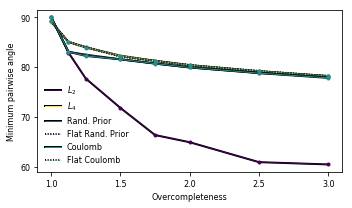

In [12]:
f, ax = plt.subplots(1, figsize=(5, 3))
x = [float(y) for y in ocs]
for ii, model in enumerate(models):
#    if model in ['2', '4', 'COULOMB']:
        ax.plot(x, np.median(min_coherence[ii, :], axis=-1), styles.line_styles[model],
                label=styles.labels[model], c = styles.colors[model], lw=styles.lw,
               path_effects=[pe.Stroke(linewidth=styles.lw+1, foreground='k'), pe.Normal()])
        ax.plot(x, np.median(min_coherence[ii, :], axis=-1), '.',
                c = styles.colors[model])
ax.set_xlabel('Overcompleteness', fontsize=styles.label_fontsize)
ax.set_ylabel('Minimum pairwise angle', fontsize=styles.label_fontsize)
ax.set_yticks([60, 70, 80, 90])
ax.set_xticks([1, 1.5, 2, 2.5, 3])
ax.tick_params(labelsize=styles.ticklabel_fontsize)
ax.legend(frameon=False, fontsize=styles.legend_fontsize)
f.tight_layout()
#ax.set_yscale('log')
plt.savefig('/home/jesse/Downloads/appendix1.pdf')
plt.show()